In [ ]:
from tensorflow import keras
# from tensorflow.keras import XXX
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(test_images.shape, train_images.shape)

(10000, 28, 28) (60000, 28, 28)


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 12s 6ms/step - loss: 0.5190 - accuracy: 0.9327
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0616 - accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0469 - accuracy: 0.9870
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0374 - accuracy: 0.9898
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0331 - accuracy: 0.9909


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc:', test_acc)
print('loss', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0704 - accuracy: 0.9880
test_acc: 0.9879999756813049
loss 0.07042337954044342


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'loss')

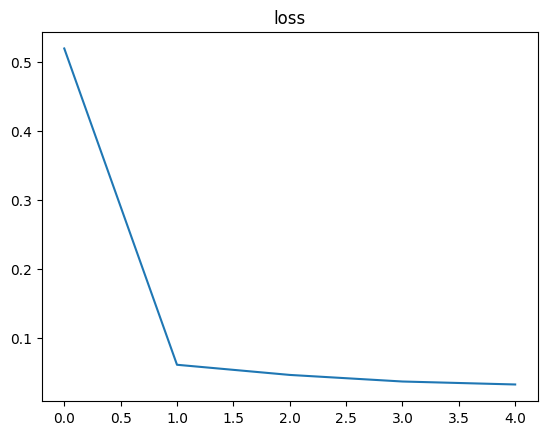

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_dict['loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

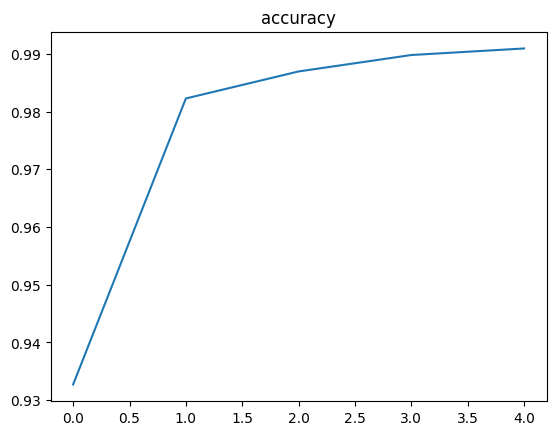

In [ ]:
plt.plot(history_dict['accuracy'])
plt.title('accuracy')

ConvNet for small dataset

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle competitions download -c dogs-vs-cats
! mkdir cats_vs_dogs
! unzip "dogs-vs-cats.zip" -d cats_vs_dogs
! mkdir cats_vs_dogs/train_data
! unzip "cats_vs_dogs/train.zip" -d cats_vs_dogs/train_data


In [ ]:
import os
import shutil
import random

# Ścieżka do katalogu, w którym znajdują się pobrane zdjęcia
downloaded_data_directory = 'cats_vs_dogs/train_data/train'

# Ścieżka do głównego katalogu, w którym będziemy tworzyć podkatalogi dla treningu i walidacji
main_directory = 'cats_vs_dogs'

# Tworzenie katalogów train i validation w głównym katalogu
train_dir = os.path.join(main_directory, 'train')
validation_dir = os.path.join(main_directory, 'validation')
test_dir = os.path.join(main_directory, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Liczba zdjęć treningowych i walidacyjnych dla każdej klasy
num_train_images = 2000 // 2  # 1000 zdjęć na klasę
num_validation_images = 1000 // 2  # 500 zdjęć na klasę
num_test_images = 500

# Tworzenie podkatalogów dla poszczególnych klas w katalogach treningowych i walidacyjnych
classes = ['cat', 'dog']
for dataset_type in ['train', 'validation', 'test']:
    for class_name in classes:
        class_dir = os.path.join(main_directory, dataset_type, class_name)
        os.makedirs(class_dir, exist_ok=True)

# Przesuwanie zdjęć do odpowiednich katalogów treningowych i walidacyjnych
for class_name in classes:
    # Pobranie listy wszystkich zdjęć danej klasy
    class_images = [filename for filename in os.listdir(downloaded_data_directory) if filename.startswith(class_name)]
    random.shuffle(class_images)  # Losowa permutacja zdjęć

    # Przesunięcie zdjęć do katalogów treningowych
    for img in class_images[:num_train_images]:
        src = os.path.join(downloaded_data_directory, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy(src, dst)

    # Przesunięcie zdjęć do katalogów walidacyjnych
    for img in class_images[num_train_images:num_train_images + num_validation_images]:
        src = os.path.join(downloaded_data_directory, img)
        dst = os.path.join(validation_dir, class_name, img)
        shutil.copy(src, dst)
    # przesuniecie do testowego
    for img in class_images[num_train_images+ num_validation_images:num_train_images + num_validation_images + num_test_images]:
        src = os.path.join(downloaded_data_directory, img)
        dst = os.path.join(test_dir, class_name, img)
        shutil.copy(src, dst)

print("Organizacja danych zakończona.")

Organizacja danych zakończona.


In [ ]:
# import cv2
# import numpy as np

# def load_images(folder):
#   images = []
#   labels = []
#   for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder, filename))
#     if img is not None:
#       images.append(img)
#       labels.append(0 if folder.endswith('cat') else 1)
#   return images, labels

# cat_images, cat_labels = load_images('cats_vs_dogs/train/cat')
# dog_images, dog_labels = load_images('cats_vs_dogs/train/dog')
# resized_cat_images = [cv2.resize(img, (150, 150)) for img in cat_images]
# resized_dog_images = [cv2.resize(img, (150, 150)) for img in dog_images]
# X_train = np.array(resized_cat_images + resized_dog_images)
# y_train = np.array(cat_labels + dog_labels)

# cat_images, cat_labels = load_images('cats_vs_dogs/validation/cat')
# dog_images, dog_labels = load_images('cats_vs_dogs/validation/dog')
# resized_cat_images = [cv2.resize(img, (150, 150)) for img in cat_images]
# resized_dog_images = [cv2.resize(img, (150, 150)) for img in dog_images]
# X_validation = np.array(resized_cat_images + resized_dog_images)
# y_validation = np.array(cat_labels + dog_labels)

# cat_images, cat_labels = load_images('cats_vs_dogs/test/cat')
# dog_images, dog_labels = load_images('cats_vs_dogs/test/dog')
# resized_cat_images = [cv2.resize(img, (150, 150)) for img in cat_images]
# resized_dog_images = [cv2.resize(img, (150, 150)) for img in dog_images]
# X_test = np.array(resized_cat_images + resized_dog_images)
# y_test = np.array(cat_labels + dog_labels)
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    'cats_vs_dogs/train',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)
val_dataset = image_dataset_from_directory(
    'cats_vs_dogs/validation',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)
test_dataset = image_dataset_from_directory(
    'cats_vs_dogs/test',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Rescaling(1./255., input_shape=(150,150,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 96)       

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 7s 42ms/step - loss: 0.6908 - accuracy: 0.5280 - val_loss: 0.6832 - val_accuracy: 0.6080
Epoch 2/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6726 - accuracy: 0.5840 - val_loss: 0.6661 - val_accuracy: 0.6150
Epoch 3/30
100/100 [==============================] - 3s 31ms/step - loss: 0.6545 - accuracy: 0.6170 - val_loss: 0.6467 - val_accuracy: 0.6220
Epoch 4/30
100/100 [==============================] - 3s 31ms/step - loss: 0.6219 - accuracy: 0.6530 - val_loss: 0.6306 - val_accuracy: 0.6350
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5840 - accuracy: 0.6815 - val_loss: 0.6129 - val_accuracy: 0.6470
Epoch 6/30
100/100 [==============================] - 3s 31ms/step - loss: 0.5561 - accuracy: 0.7130 - val_loss: 0.6200 - val_accuracy: 0.6500
Epoch 7/30
100/100 [==============================] - 3s 31ms/step - loss: 0.5403 - accuracy: 0.7275 - val_loss: 0.6197 - val_accuracy: 0.6390

Text(0.5, 1.0, 'loss')

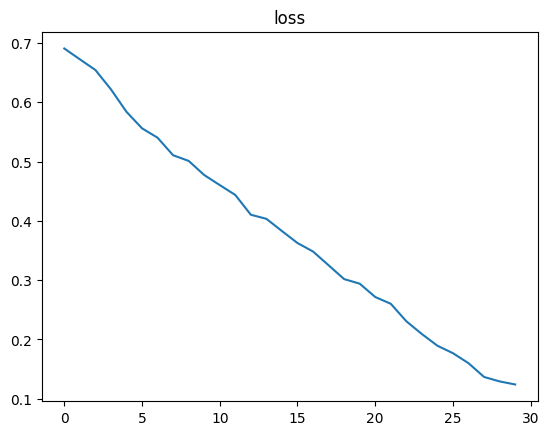

In [ ]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

plt.plot(history_dict['loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

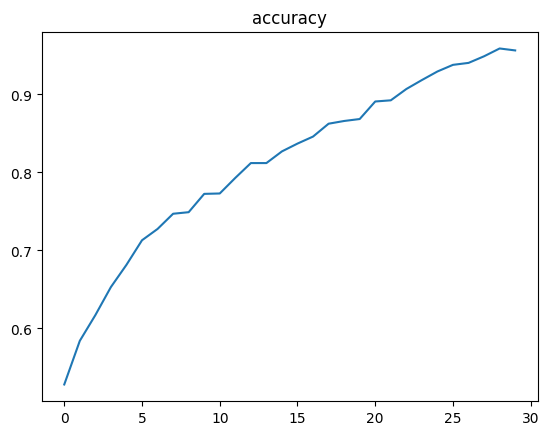

In [ ]:
plt.plot(history_dict['accuracy'])
plt.title('accuracy')
# WARTO NAŁOŻYĆ WALIDACYJNY NA TEN TRENINGOWY I PORÓWNAĆ

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('test_acc:', test_acc)
print('test loss: ', test_loss)

50/50 [==============================] - 1s 17ms/step - loss: 0.7829 - accuracy: 0.7450
test_acc: 0.7450000047683716
test loss:  0.7828982472419739
